## Task 3: To Explore Unsupervised Machine Learning.

### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

__Importing Libraries__

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

__Loading Dataset__

In [2]:
iris = pd.read_csv("iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


#### By looking at the data
__Numeric Variables:__
    
- Id
- SepalLenghtCm
- SepalWidthCm
- PetalLenghtCm
- PetalWidthCm

__Categorical Variables:__

- Species

In [4]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


__Checking for missing values__

In [5]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

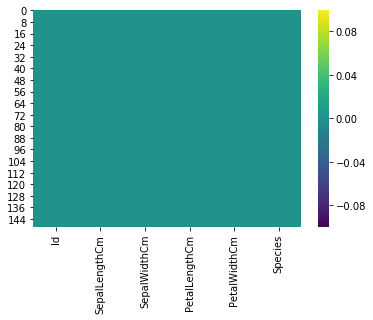

In [7]:
sns.heatmap(iris.isnull(),cmap='viridis',annot= False);

Above figure clearly shows that the dataset does not contain any missing values.

### Exploratory Data Analysis.
__Univariate Analysis__

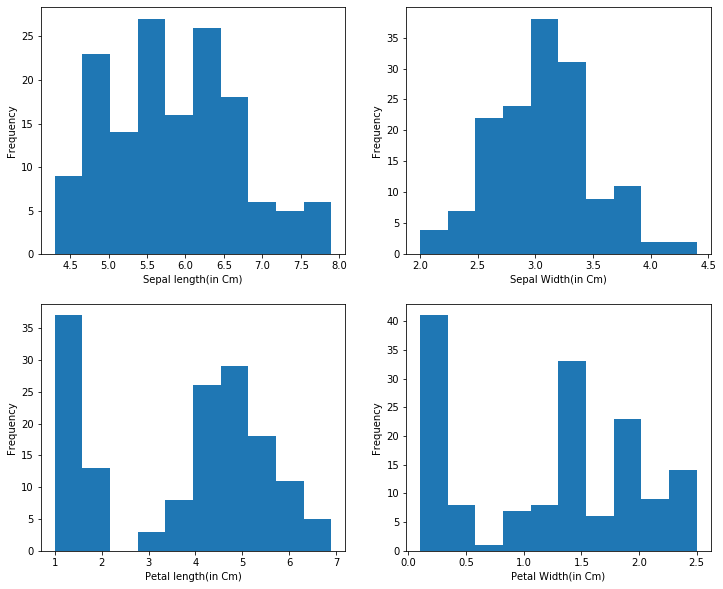

In [11]:
#Numerical
plt.figure(figsize = (12,10))

plt.subplot(2,2,1)
plt.hist(iris['SepalLengthCm'])
plt.xlabel('Sepal length(in Cm)')
plt.ylabel('Frequency')

plt.subplot(2,2,2)
plt.hist(iris['SepalWidthCm'])
plt.xlabel('Sepal Width(in Cm)')
plt.ylabel('Frequency')

plt.subplot(2,2,3)
plt.hist(iris['PetalLengthCm'])
plt.xlabel('Petal length(in Cm)')
plt.ylabel('Frequency')

plt.subplot(2,2,4)
plt.hist(iris['PetalWidthCm'])
plt.xlabel('Petal Width(in Cm)')
plt.ylabel('Frequency');

- Most of data has sepal length lies between 4.5 to 6.5

- Most of the data points has sepal width between 2.5 to 3.5

- There are only few data points having petal length between 2-3 and of the data has petal length between 4-5-5.5

- Petal width is not uniformly distributed.

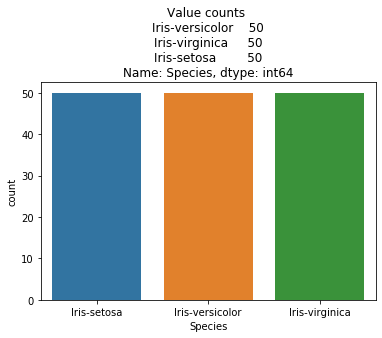

In [14]:
#For Categorical
sns.countplot(x = iris['Species'])
plt.title('Value counts \n{}'.format(iris['Species'].value_counts()));

- All the class labels have equal data points therefore this is a balanced dataset.

__Bivariate Analysis__

In [15]:
#Numerical
iris.corr(method = 'pearson')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


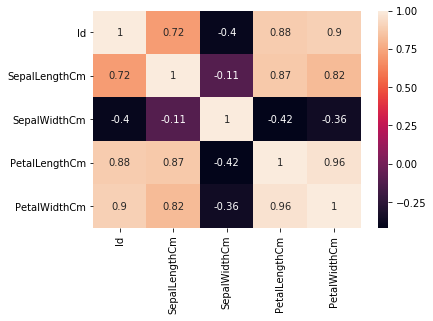

In [16]:
sns.heatmap(iris.corr(method = 'pearson'),annot = True,);

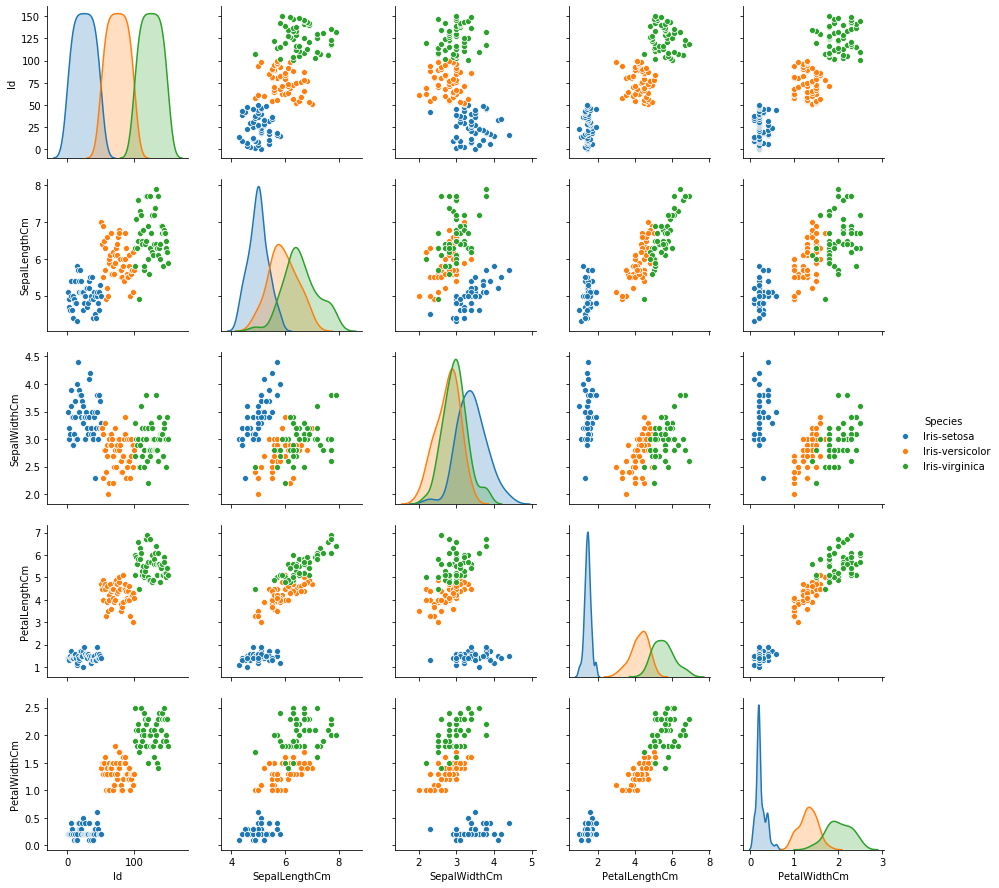

In [11]:
sns.pairplot(iris, hue = "Species");

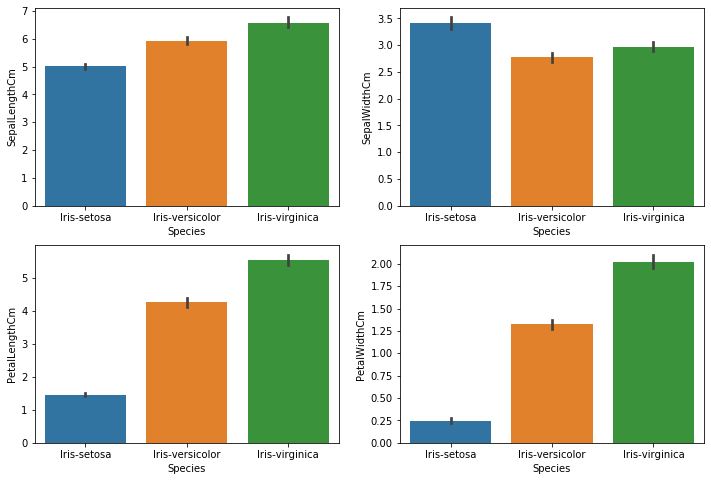

In [18]:
# Numerical vs Categorical
plt.figure(figsize = (12,8))

plt.subplot(2,2,1)
sns.barplot(x= 'Species', y = 'SepalLengthCm', data = iris)

plt.subplot(2,2,2)
sns.barplot(x= 'Species', y = 'SepalWidthCm', data = iris)

plt.subplot(2,2,3)
sns.barplot(x= 'Species', y = 'PetalLengthCm', data = iris)

plt.subplot(2,2,4)
sns.barplot(x= 'Species', y = 'PetalWidthCm', data = iris);

- "Iris-Setosa" is the species who has highest "Sepal Width" but have lowest "Sepal length", "Petal length" and "Petal Width" than other Species. The "Petal length" and "Petal Width" of this Species is somewhere around 1.5cm and 0.25 cm respectively where as other Species have much more than this.

- "Verginica" is the species which has the highest "Sepal length", "Petal length" and "Petal Width". So we can conclude that the "Iris-Verginica" is the Weighted Species.

- From the above plots we make one inference on the "Weight of the Species" are in the order,
                         __Iris-VerginicaWeight > Iris-VersiclorWeight > Iris-SetosaWeight__

__Spliting the Dependent & Independent variables__

In [19]:
X = iris.iloc[:, [0, 1, 2, 3]].values
y = iris.iloc[:, 4].values

In [20]:
print(f"Size of X is: {X.shape}")
print(f"Size of y is: {y.shape}")

Size of X is: (150, 4)
Size of y is: (150,)


__Feature Scaling__

In [24]:
sc_X = StandardScaler()
X_scaled = sc_X.fit_transform(X)
print(X_scaled)

[[-1.72054204 -0.90068117  1.03205722 -1.3412724 ]
 [-1.69744751 -1.14301691 -0.1249576  -1.3412724 ]
 [-1.67435299 -1.38535265  0.33784833 -1.39813811]
 [-1.65125846 -1.50652052  0.10644536 -1.2844067 ]
 [-1.62816394 -1.02184904  1.26346019 -1.3412724 ]
 [-1.60506942 -0.53717756  1.95766909 -1.17067529]
 [-1.58197489 -1.50652052  0.80065426 -1.3412724 ]
 [-1.55888037 -1.02184904  0.80065426 -1.2844067 ]
 [-1.53578584 -1.74885626 -0.35636057 -1.3412724 ]
 [-1.51269132 -1.14301691  0.10644536 -1.2844067 ]
 [-1.4895968  -0.53717756  1.49486315 -1.2844067 ]
 [-1.46650227 -1.26418478  0.80065426 -1.227541  ]
 [-1.44340775 -1.26418478 -0.1249576  -1.3412724 ]
 [-1.42031323 -1.87002413 -0.1249576  -1.51186952]
 [-1.3972187  -0.05250608  2.18907205 -1.45500381]
 [-1.37412418 -0.17367395  3.11468391 -1.2844067 ]
 [-1.35102965 -0.53717756  1.95766909 -1.39813811]
 [-1.32793513 -0.90068117  1.03205722 -1.3412724 ]
 [-1.30484061 -0.17367395  1.72626612 -1.17067529]
 [-1.28174608 -0.90068117  1.72

__Clustering__

Finding optimum number of clusters for K means.

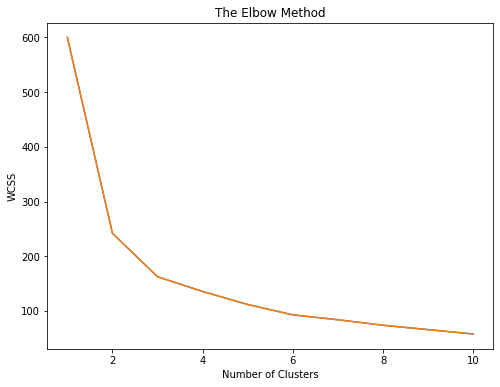

In [30]:
# Using the elbow method to find the optimal number of clusters
wcss = []    # Within Cluster Sum of Squares
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300,n_init = 10, random_state = 42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    

plt.figure(figsize = (8,6))
plt.plot(np.arange(1, 11,1), wcss)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel("WCSS");

- We get the Elbow Bend at "3" in above graph, From this we choose the number of clusters as 3.

In [34]:
# Creating the KMeans Classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)

y_means = kmeans.fit_predict(X_scaled)
y_means

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [35]:
kmeans.cluster_centers_

array([[ 0.11643489, -0.128236  , -0.88183813,  0.25333671],
       [-1.16250293, -1.00206653,  0.89510445, -1.30297509],
       [ 0.96931639,  1.04257713, -0.02890354,  0.97520033]])

In [36]:
kmeans.cluster_centers_[:, 0]
kmeans.cluster_centers_[:,1]

array([-0.128236  , -1.00206653,  1.04257713])

__*Visualising the clusters*__

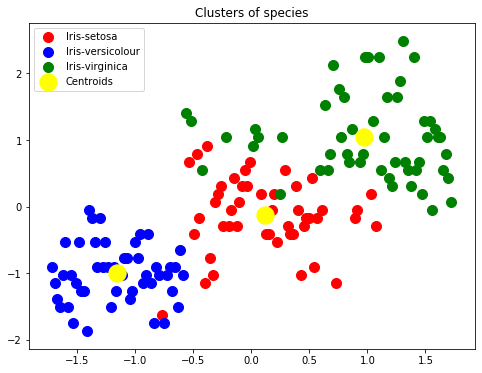

In [46]:
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[y_means == 0, 0], X_scaled[y_means == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X_scaled[y_means == 1, 0], X_scaled[y_means == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X_scaled[y_means == 2, 0], X_scaled[y_means == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of species')
plt.legend()
plt.show()

__Visualising the clusters - On the first two columns__

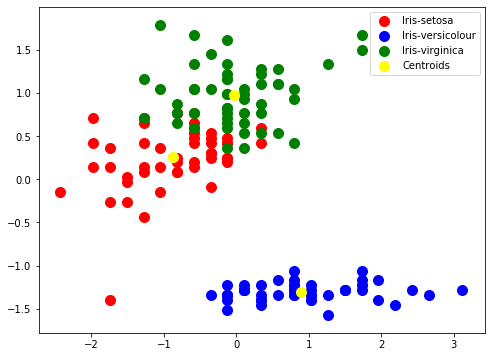

In [48]:
plt.figure(figsize = (8,6))
plt.scatter(X_scaled[y_means == 0, 2], X_scaled[y_means == 0, 3], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X_scaled[y_means == 1, 2], X_scaled[y_means == 1, 3], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X_scaled[y_means == 2, 2], X_scaled[y_means == 2, 3], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 100, c = 'yellow', label = 'Centroids')

plt.legend();

### __Finally, we are able to separate our data points into 3 differnet groups.__